In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np


file_name = "df_vector.pkl"

In [2]:
df_vector = pd.read_pickle(file_name)
df_vector.head()

,Theme,FeatureVector,WordVector
0,Mathematics,"[0.04838709677419355, 0.03225806451612903, 0.0...","[0, zero, number, numerical, digit, use, repre..."
Abiogenesis,Science,"[0.003003003003003003, 0.003003003003003003, 0...","[biology, abiogenesis, ‘, ’, greek, bios, ‘, l..."
Abortion,Society and social sciences,"[0.01282051282051282, 0.003205128205128205, 0....","[abortion, termination, pregnancy, removal, ex..."
Abraham Lincoln,People,"[0.0, 0.0030581039755351682, 0.006116207951070...","[abraham, lincoln, link, ən, february, 12, 180..."
Abraham,People,"[0.0, 0.005681818181818182, 0.0056818181818181...","[abraham, originally, abram, common, hebrew, p..."


# Test Train Split For Vectors
No need to standerdize the data as the vectors are standardized

In [3]:
x_vector = df_vector.FeatureVector.copy()
y_vector = df_vector.Theme.copy()
y_vector.head()

0                                  Mathematics
Abiogenesis                            Science
Abortion           Society and social sciences
Abraham Lincoln                         People
Abraham                                 People
Name: Theme, dtype: object

In [4]:
x_vec_train, x_vec_test, y_vec_train, y_vec_test = train_test_split(x_vector, y_vector, test_size=0.2, random_state=5)

In [5]:
x_vec_test.head()

Tea                                                  [0.0, 0.006944444444444444, 0.0069444444444444...
Hippocrates                                          [0.01680672268907563, 0.0, 0.01680672268907563...
Medication                                           [0.024539877300613498, 0.006134969325153374, 0...
International Red Cross and Red Crescent Movement    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Black Death                                          [0.0, 0.0, 0.008620689655172414, 0.00862068965...
Name: FeatureVector, dtype: object

In [6]:
y_vec_test.head()

Tea                                                                 Everyday life
Hippocrates                                                                People
Medication                                           Health, medicine and disease
International Red Cross and Red Crescent Movement     Society and social sciences
Black Death                                                               History
Name: Theme, dtype: object

Check for NaN

In [7]:
tmp = [x_vec_train, x_vec_test, y_vec_train, y_vec_test]

for e in tmp:
    print(e.isnull().values.any())

False
False
False
False


In [8]:
x_vec_train = x_vec_train.to_numpy()

# K-Means


In [9]:
import numpy as np

x_vec_train = np.stack(x_vec_train)

In [10]:
k = 11
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(x_vec_train)

[Homogeneity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html): It estimates how many of the clusters predicted contain only members of a single class. 1.0 stands for perfectly homogeneous labeling.
[Completeness](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html): A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. 1.0 stands for perfectly complete labeling.
[V-measure](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.htm): The V-measure is the harmonic mean between homogeneity and completeness. 1.0 stands for perfectly complete labeling
[Silhouette Coefficient Mean](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html): The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [11]:
from sklearn.metrics import silhouette_score, v_measure_score, completeness_score, homogeneity_score

saved_scores = []

def performance(model, type, dimension, k, y_pred=None, train_set=x_vec_train):
    if y_pred is None:
        y_pred = model.predict(train_set)
    homogeneity = homogeneity_score(y_vec_train, y_pred)
    completeness = completeness_score(y_vec_train, y_pred)
    v_measure = v_measure_score(y_vec_train, y_pred)
    silhouette_score_result = None

    print(f"Homogeneity: \t{homogeneity:.10f}")
    print(f"Completeness: \t{completeness:.10f}")
    print(f"V-measure: \t{v_measure:.10f}")
    if model:
        silhouette_score_result = silhouette_score(x_vec_train, model.labels_, metric='euclidean')
        print("Silhouette Score")
        print("\tEuclidean: %0.5f" % silhouette_score_result)

    data = {'Type': type, 'Dimension': dimension, 'k': k, 'Homogeneity': homogeneity, 'Completeness': completeness, 'V-measure': v_measure, 'Silhouette Score': silhouette_score_result}

    saved_scores.append(data)



In [12]:
performance(kmeans, 'K-Means', 5000, 11)

Homogeneity: 	0.2295669483
Completeness: 	0.3653055716
V-measure: 	0.2819497706
Silhouette Score
	Euclidean: -0.02496


In [13]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

# Q1: Any alternatives for Voronoi diagram?
I wasn't able to plot using the code from the lab or using scipy

In [14]:
# plt.figure(figsize=(8, 4))
# plot_decision_boundaries(kmeans, x_vec_train)
# plt.show()

In [15]:
# from scipy.spatial import Voronoi, voronoi_plot_2d
# vor = Voronoi(x_vec_train)
# fig = voronoi_plot_2d(vor, show_vertices=False, line_colors='orange',
#                 line_width=2, line_alpha=0.6, point_size=2)
# plt.show()

Plot the first k-means cluster

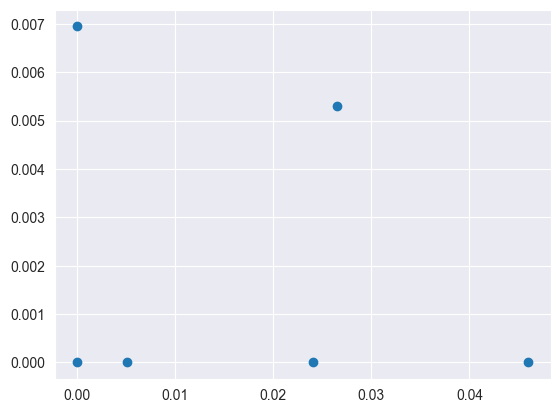

In [16]:
import matplotlib.pyplot as plt

#filter rows of original data
filtered_label0 = x_vec_train[y_pred == 0]

#plotting the results
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

Plot all the k-means clusters

<function matplotlib.pyplot.show(close=None, block=None)>

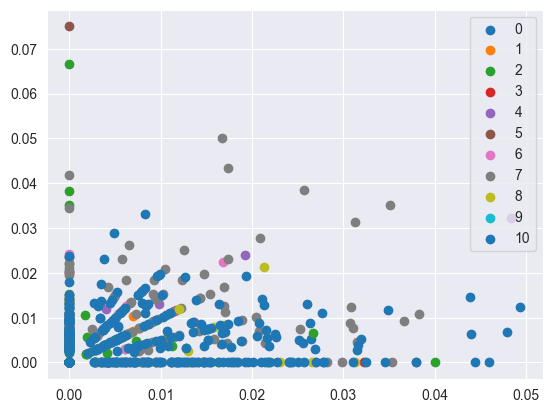

In [17]:
u_labels = np.unique(y_pred)

for i in u_labels:
    plt.scatter(x_vec_train[y_pred == i , 0] , x_vec_train[y_pred == i , 1],label = i)
plt.legend()
plt.show

Plot all the k-means clusters with the cluster centroids

<function matplotlib.pyplot.show(close=None, block=None)>

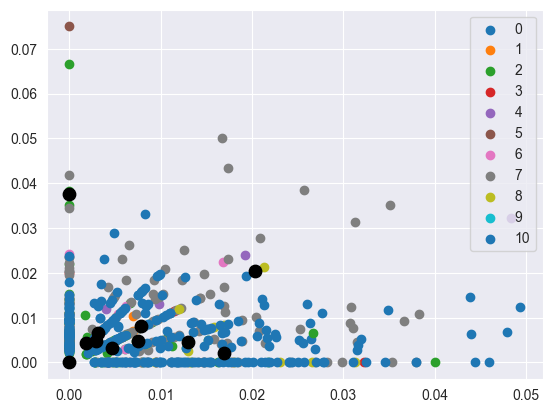

In [18]:
centroids = kmeans.cluster_centers_

for i in u_labels:
    plt.scatter(x_vec_train[y_pred == i , 0] , x_vec_train[y_pred == i , 1],label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show

# K-Means for 1 to n number of iterations

In [19]:
n = 20

In [20]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(x_vec_train) for k in range(2, n)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [21]:
i = 2
for kmeans in kmeans_per_k:
    print("K =", i)
    performance(kmeans, 'K-Means', 5000, i)
    print()
    i+=1

K = 2
Homogeneity: 	0.1189128330
Completeness: 	0.4673516530
V-measure: 	0.1895871587
Silhouette Score
	Euclidean: -0.01786

K = 3
Homogeneity: 	0.1630364798
Completeness: 	0.4573387303
V-measure: 	0.2403800006
Silhouette Score
	Euclidean: -0.01828

K = 4
Homogeneity: 	0.2031337264
Completeness: 	0.4484408746
V-measure: 	0.2796102420
Silhouette Score
	Euclidean: -0.02428

K = 5
Homogeneity: 	0.2662718715
Completeness: 	0.4408794509
V-measure: 	0.3320188841
Silhouette Score
	Euclidean: -0.02622

K = 6
Homogeneity: 	0.2162580208
Completeness: 	0.3756655119
V-measure: 	0.2744972132
Silhouette Score
	Euclidean: -0.02197

K = 7
Homogeneity: 	0.1871541835
Completeness: 	0.3951295669
V-measure: 	0.2540003956
Silhouette Score
	Euclidean: -0.02305

K = 8
Homogeneity: 	0.2571581123
Completeness: 	0.3599797840
V-measure: 	0.3000033615
Silhouette Score
	Euclidean: -0.05745

K = 9
Homogeneity: 	0.2592250623
Completeness: 	0.4081476748
V-measure: 	0.3170705081
Silhouette Score
	Euclidean: -0.02326



There's 11 categories in the dataset. However, the accuracy was best at k = 15 and second was k = 12. k = 11 scored a lot lower.

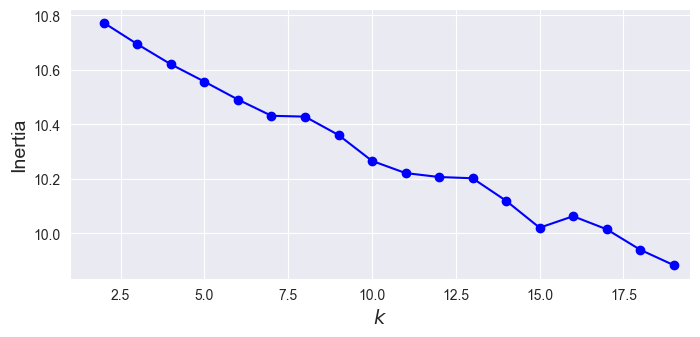

In [22]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8, 3.5))
plt.plot(range(2, n), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 19.5, inertias[-1]-0.05, inertias[0]+0.05])
plt.show()

Conclusion: No clear elbow, the change in accuracy is rather gradual.

## PCA reduction to 2 dimension

In [23]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(x_vec_train)

In [24]:
kmeans_per_k_PCA = [KMeans(n_clusters=k, random_state=42).fit(reduced_data) for k in range(2, n)]
inertias_PCA = [model.inertia_ for model in kmeans_per_k_PCA]

In [25]:
i = 2
for kmeans in kmeans_per_k_PCA:
    print("K =", i)
    performance(kmeans, 'K-Ms×PCA', 2, i, train_set=reduced_data)
    print()
    i+=1

K = 2
Homogeneity: 	0.1295958045
Completeness: 	0.4476291876
V-measure: 	0.2009991441
Silhouette Score
	Euclidean: -0.00485

K = 3
Homogeneity: 	0.1250244297
Completeness: 	0.4351078300
V-measure: 	0.1942366552
Silhouette Score
	Euclidean: -0.00933

K = 4
Homogeneity: 	0.2116273076
Completeness: 	0.4345549535
V-measure: 	0.2846370145
Silhouette Score
	Euclidean: -0.02300

K = 5
Homogeneity: 	0.2159903205
Completeness: 	0.3586582391
V-measure: 	0.2696142075
Silhouette Score
	Euclidean: -0.03688

K = 6
Homogeneity: 	0.2380319661
Completeness: 	0.3753664369
V-measure: 	0.2913252155
Silhouette Score
	Euclidean: -0.04136

K = 7
Homogeneity: 	0.2543852120
Completeness: 	0.3473915087
V-measure: 	0.2937011671
Silhouette Score
	Euclidean: -0.04254

K = 8
Homogeneity: 	0.2688831453
Completeness: 	0.3389132980
V-measure: 	0.2998637934
Silhouette Score
	Euclidean: -0.04252

K = 9
Homogeneity: 	0.2728285587
Completeness: 	0.3168562624
V-measure: 	0.2931987879
Silhouette Score
	Euclidean: -0.04548



Conclusion: k = 14 and k = 16 scored the best with V-score at .318. However, without reduction the accuracy was higher overall. Without reduction the max was .382

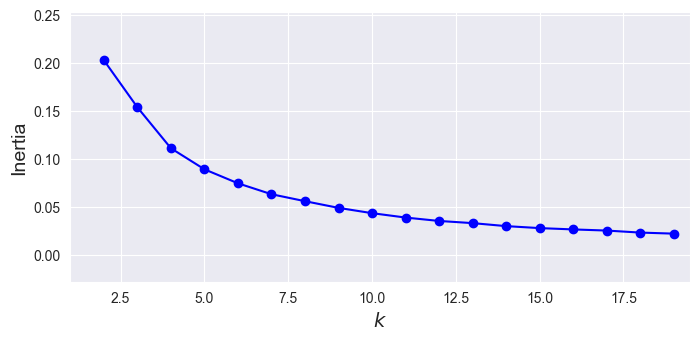

In [26]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, n), inertias_PCA, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 19.5, inertias_PCA[-1]-0.05, inertias_PCA[0]+0.05])
plt.show()

Conclusion: The elbow here is more obvious at 9 or 10.

# PCA reduction to 8 dimension

In [27]:
reduced_data_8 = PCA(n_components=8).fit_transform(x_vec_train)
kmeans_per_k_PCA_8 = [KMeans(n_clusters=k, random_state=42).fit(reduced_data_8) for k in range(2, n)]
inertias_PCA_8 = [model.inertia_ for model in kmeans_per_k_PCA_8]
i = 2
for kmeans in kmeans_per_k_PCA_8:
    print("K =", i)
    performance(kmeans, 'K-Ms×PCA', 8, i, train_set=reduced_data_8)
    print()
    i += 1

K = 2
Homogeneity: 	0.1335935127
Completeness: 	0.4640465785
V-measure: 	0.2074613580
Silhouette Score
	Euclidean: -0.00647

K = 3
Homogeneity: 	0.1380098647
Completeness: 	0.4711812478
V-measure: 	0.2134885389
Silhouette Score
	Euclidean: -0.00667

K = 4
Homogeneity: 	0.1942793134
Completeness: 	0.4226693665
V-measure: 	0.2662001460
Silhouette Score
	Euclidean: -0.01100

K = 5
Homogeneity: 	0.2754741687
Completeness: 	0.4589854676
V-measure: 	0.3443038497
Silhouette Score
	Euclidean: -0.01982

K = 6
Homogeneity: 	0.3033688686
Completeness: 	0.4712668361
V-measure: 	0.3691223785
Silhouette Score
	Euclidean: -0.03025

K = 7
Homogeneity: 	0.3103946092
Completeness: 	0.4782705010
V-measure: 	0.3764654562
Silhouette Score
	Euclidean: -0.03007

K = 8
Homogeneity: 	0.3080321547
Completeness: 	0.4353623385
V-measure: 	0.3607925548
Silhouette Score
	Euclidean: -0.03411

K = 9
Homogeneity: 	0.3181461198
Completeness: 	0.4164987302
V-measure: 	0.3607388112
Silhouette Score
	Euclidean: -0.03306



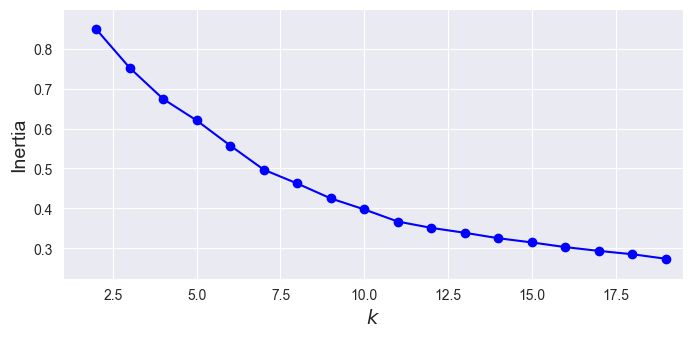

In [28]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, n), inertias_PCA_8, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.axis([1, 19.5, inertias_PCA_8[-1]-0.05 , inertias_PCA_8[0]+0.05])
plt.show()

Conclusion: Reducing the dimensions from 5000 to 8 improved the V-score a lot. The top 3 V-scores are 0.455 (k = 16), 0.454 (k = 19), 0.448 (k =17). However the change in inertia is more gradual compared to when there was only 2 categories.

# PCA reduction to m dimension

####################
Dimension:  10 

K = 2
Homogeneity: 	0.1274771182
Completeness: 	0.4505746549
V-measure: 	0.1987294606
Silhouette Score
	Euclidean: -0.00850

K = 3
Homogeneity: 	0.1267241877
Completeness: 	0.4439604854
V-measure: 	0.1971685399
Silhouette Score
	Euclidean: -0.01019

K = 4
Homogeneity: 	0.2003645654
Completeness: 	0.4306981734
V-measure: 	0.2734962691
Silhouette Score
	Euclidean: -0.01217

K = 5
Homogeneity: 	0.2024209873
Completeness: 	0.4313056010
V-measure: 	0.2755298805
Silhouette Score
	Euclidean: -0.01852

K = 6
Homogeneity: 	0.2780543580
Completeness: 	0.4624675956
V-measure: 	0.3472986311
Silhouette Score
	Euclidean: -0.02220

K = 7
Homogeneity: 	0.2781576669
Completeness: 	0.4436119930
V-measure: 	0.3419209309
Silhouette Score
	Euclidean: -0.02289

K = 8
Homogeneity: 	0.3126068439
Completeness: 	0.4385707122
V-measure: 	0.3650274294
Silhouette Score
	Euclidean: -0.03227

K = 9
Homogeneity: 	0.3571391443
Completeness: 	0.4425167400
V-measure: 	0.3952701479
S

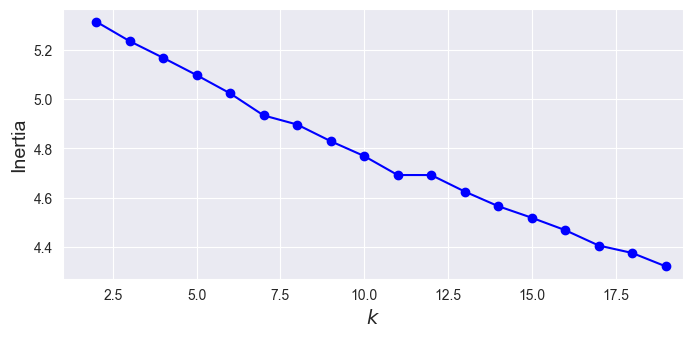


####################
Dimension:  130 

K = 2
Homogeneity: 	0.1333174907
Completeness: 	0.4585082430
V-measure: 	0.2065715124
Silhouette Score
	Euclidean: -0.00406

K = 3
Homogeneity: 	0.1768391171
Completeness: 	0.5264564165
V-measure: 	0.2647481278
Silhouette Score
	Euclidean: -0.01728

K = 4
Homogeneity: 	0.1707587322
Completeness: 	0.3849752178
V-measure: 	0.2365804001
Silhouette Score
	Euclidean: -0.02139

K = 5
Homogeneity: 	0.1811656327
Completeness: 	0.4004055740
V-measure: 	0.2494612124
Silhouette Score
	Euclidean: -0.00243

K = 6
Homogeneity: 	0.2560172104
Completeness: 	0.3807450883
V-measure: 	0.3061654108
Silhouette Score
	Euclidean: -0.01615

K = 7
Homogeneity: 	0.2178747200
Completeness: 	0.3405833723
V-measure: 	0.2657478078
Silhouette Score
	Euclidean: -0.00190

K = 8
Homogeneity: 	0.2229865095
Completeness: 	0.4318318670
V-measure: 	0.2941050043
Silhouette Score
	Euclidean: -0.03133

K = 9
Homogeneity: 	0.3006172011
Completeness: 	0.4532213320
V-measure: 	0.3614729742

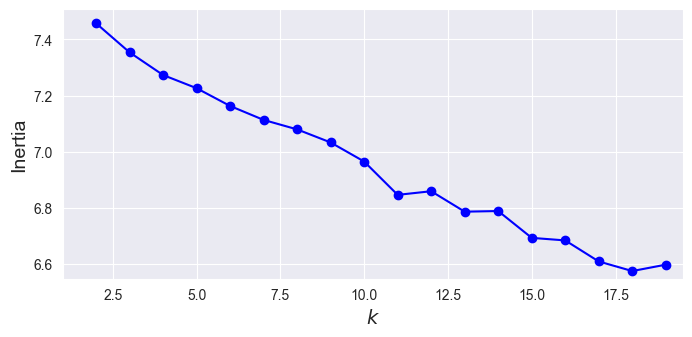


####################
Dimension:  250 

K = 2
Homogeneity: 	0.1347437075
Completeness: 	0.4567365826
V-measure: 	0.2080961328
Silhouette Score
	Euclidean: -0.00085

K = 3
Homogeneity: 	0.1377917695
Completeness: 	0.4145308034
V-measure: 	0.2068317890
Silhouette Score
	Euclidean: -0.01670

K = 4
Homogeneity: 	0.2782533480
Completeness: 	0.4949376941
V-measure: 	0.3562329694
Silhouette Score
	Euclidean: -0.03840

K = 5
Homogeneity: 	0.2323564884
Completeness: 	0.3851620367
V-measure: 	0.2898533232
Silhouette Score
	Euclidean: -0.03594

K = 6
Homogeneity: 	0.1921504859
Completeness: 	0.3981023831
V-measure: 	0.2591959154
Silhouette Score
	Euclidean: -0.01171

K = 7
Homogeneity: 	0.2638308328
Completeness: 	0.4312235444
V-measure: 	0.3273702622
Silhouette Score
	Euclidean: -0.01331

K = 8
Homogeneity: 	0.2946481794
Completeness: 	0.4736342376
V-measure: 	0.3632920986
Silhouette Score
	Euclidean: -0.03096

K = 9
Homogeneity: 	0.2699504287
Completeness: 	0.4110336782
V-measure: 	0.3258775543

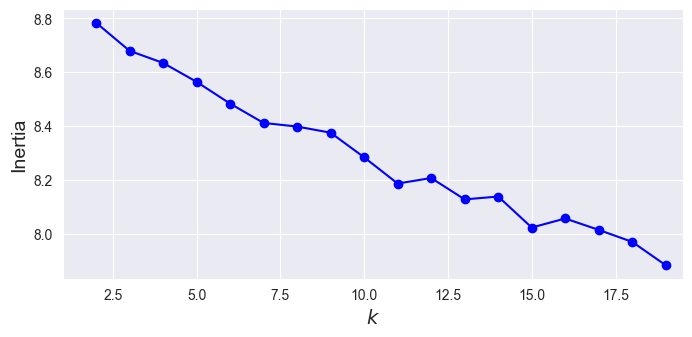


####################
Dimension:  370 

K = 2
Homogeneity: 	0.1171336836
Completeness: 	0.4350650674
V-measure: 	0.1845740283
Silhouette Score
	Euclidean: -0.01507

K = 3
Homogeneity: 	0.1395660485
Completeness: 	0.4629517551
V-measure: 	0.2144744827
Silhouette Score
	Euclidean: 0.00090

K = 4
Homogeneity: 	0.1462603367
Completeness: 	0.3317376924
V-measure: 	0.2030136680
Silhouette Score
	Euclidean: 0.00704

K = 5
Homogeneity: 	0.1838177320
Completeness: 	0.3676828192
V-measure: 	0.2451008318
Silhouette Score
	Euclidean: 0.00083

K = 6
Homogeneity: 	0.1912414794
Completeness: 	0.3887615761
V-measure: 	0.2563687837
Silhouette Score
	Euclidean: -0.03105

K = 7
Homogeneity: 	0.2836919829
Completeness: 	0.4555435481
V-measure: 	0.3496424266
Silhouette Score
	Euclidean: -0.04374

K = 8
Homogeneity: 	0.3052580873
Completeness: 	0.4551861540
V-measure: 	0.3654423222
Silhouette Score
	Euclidean: -0.04727

K = 9
Homogeneity: 	0.2126649483
Completeness: 	0.3880620527
V-measure: 	0.2747577394
Si

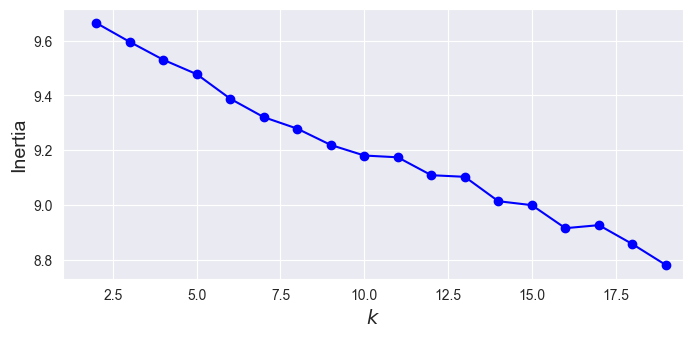


####################
Dimension:  490 

K = 2
Homogeneity: 	0.1161977232
Completeness: 	0.4526213316
V-measure: 	0.1849219633
Silhouette Score
	Euclidean: -0.01771

K = 3
Homogeneity: 	0.1216401031
Completeness: 	0.4633995229
V-measure: 	0.1926979412
Silhouette Score
	Euclidean: -0.01909

K = 4
Homogeneity: 	0.1955581108
Completeness: 	0.4453675610
V-measure: 	0.2717795297
Silhouette Score
	Euclidean: -0.02534

K = 5
Homogeneity: 	0.2241447983
Completeness: 	0.4931545574
V-measure: 	0.3082061288
Silhouette Score
	Euclidean: -0.03666

K = 6
Homogeneity: 	0.0485171693
Completeness: 	0.2046624016
V-measure: 	0.0784395073
Silhouette Score
	Euclidean: 0.01803

K = 7
Homogeneity: 	0.1697864569
Completeness: 	0.4004511113
V-measure: 	0.2384661381
Silhouette Score
	Euclidean: -0.01769

K = 8
Homogeneity: 	0.2366063686
Completeness: 	0.4723912207
V-measure: 	0.3152923874
Silhouette Score
	Euclidean: -0.02128

K = 9
Homogeneity: 	0.2523027566
Completeness: 	0.4126218721
V-measure: 	0.3131351473


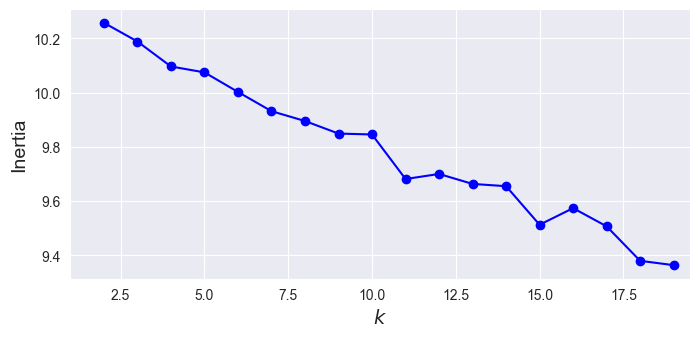


####################
Dimension:  610 

K = 2
Homogeneity: 	0.1187054304
Completeness: 	0.4676015602
V-measure: 	0.1893439626
Silhouette Score
	Euclidean: -0.01857

K = 3
Homogeneity: 	0.1207381511
Completeness: 	0.4649277809
V-measure: 	0.1916946764
Silhouette Score
	Euclidean: -0.01952

K = 4
Homogeneity: 	0.2717492455
Completeness: 	0.4652020643
V-measure: 	0.3430845656
Silhouette Score
	Euclidean: -0.02522

K = 5
Homogeneity: 	0.2637300347
Completeness: 	0.4498947877
V-measure: 	0.3325298231
Silhouette Score
	Euclidean: -0.02614

K = 6
Homogeneity: 	0.2246413794
Completeness: 	0.4291685303
V-measure: 	0.2949144980
Silhouette Score
	Euclidean: -0.02475

K = 7
Homogeneity: 	0.2022113925
Completeness: 	0.4142183752
V-measure: 	0.2717573967
Silhouette Score
	Euclidean: -0.02381

K = 8
Homogeneity: 	0.3126816329
Completeness: 	0.4726083945
V-measure: 	0.3763602220
Silhouette Score
	Euclidean: -0.02960

K = 9
Homogeneity: 	0.3119261141
Completeness: 	0.4374074445
V-measure: 	0.3641604006

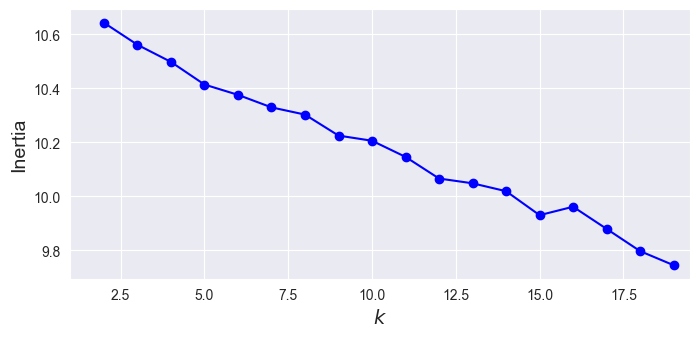


####################
Dimension:  730 

K = 2
Homogeneity: 	0.1186924265
Completeness: 	0.4654319428
V-measure: 	0.1891489195
Silhouette Score
	Euclidean: -0.01849

K = 3
Homogeneity: 	0.1728316249
Completeness: 	0.3846456929
V-measure: 	0.2384991747
Silhouette Score
	Euclidean: -0.02394

K = 4
Homogeneity: 	0.2545883633
Completeness: 	0.4555306202
V-measure: 	0.3266291924
Silhouette Score
	Euclidean: -0.02765

K = 5
Homogeneity: 	0.1928237675
Completeness: 	0.3843056180
V-measure: 	0.2567994596
Silhouette Score
	Euclidean: -0.02810

K = 6
Homogeneity: 	0.1935561411
Completeness: 	0.4236871469
V-measure: 	0.2657209913
Silhouette Score
	Euclidean: -0.00411

K = 7
Homogeneity: 	0.1435131223
Completeness: 	0.4128090858
V-measure: 	0.2129827642
Silhouette Score
	Euclidean: -0.02032

K = 8
Homogeneity: 	0.1878941706
Completeness: 	0.3770018091
V-measure: 	0.2507946410
Silhouette Score
	Euclidean: -0.02530

K = 9
Homogeneity: 	0.3201091327
Completeness: 	0.5467114538
V-measure: 	0.4037913544

In [29]:
for m in range(10, min(x_vec_train.shape), 10):
    reduced_data_m = PCA(n_components=m).fit_transform(x_vec_train)
    kmeans_per_k_PCA_m = [KMeans(n_clusters=k, random_state=42).fit(reduced_data_m) for k in range(2, n)]
    inertias_PCA_m = [model.inertia_ for model in kmeans_per_k_PCA_m]
    i = 2

    print("####################")
    print("Dimension: ", m, '\n')
    for kmeans in kmeans_per_k_PCA_m:
        print("K =", i)
        performance(kmeans, 'K-Ms×PCA', m, i, train_set=reduced_data_m)
        print()
        i += 1

    if m % 120 == 0:
        plt.figure(figsize=(8, 3.5))
        plt.plot(range(2, n), inertias_PCA_m, "bo-")
        plt.xlabel("$k$", fontsize=14)
        plt.ylabel("Inertia", fontsize=14)
        plt.axis([1, 19.5, inertias_PCA_m[-1]-0.05 , inertias_PCA_m[0]+0.05])
        print("Dimension :", m)
        plt.show()

        print()

plt.show()

Lab Question: *Research some of the existing algorithms to compute the optimal number of clusters. For example, look up: Elbow method, the silhouette method, cluster validity and similarity measures. Can these algorithms help you to find the optimal number of clusters for your data set?*

Algorithms used to compute the optimal number of clusters are :
- Elbow method : The elbow method, involves creating a plot with the number of clusters on the x-axis and the total within sum of squares on the y-axis and then identifying where an “elbow” or bend appears in the plot. The point on the x-axis where the “elbow” occurs tells us the optimal number of clusters to use in the k-means clustering algorithm.
- The silhouette method : Elbow is very simple but is not adapted to complex problems, the silhouette method is considered as better. Conceptually, the Silhouette score utilizes some distance parameter to measure how far a point is from its cluster compared to the centroid of a different cluster. The Average Silhouette Method takes the average Silhouette score of each data point for each cluster. This measure as a range between -1 and 1, 1 being the best, we can find the best number of clusters by calculating silhouette score for different cluster number.
- Cluster validity : The term cluster validation is used to design the procedure of evaluating the goodness of clustering algorithm results. This is important to avoid finding patterns in a random data, as well as, in the situation where you want to compare two clustering algorithms. There is 3 principle techniques : -Internal cluster validation, which uses the internal information of the clustering process to evaluate the goodness of a clustering structure -External cluster validation, which consists in comparing the results of a cluster analysis to an externally known result -Relative cluster validation, which evaluates the clustering structure by varying different parameter values for the same algorithm

Yes those algorithms can help us find the optimal number of cluster for our data set, the best fit would probanbly be using the silhouette method and relative cluster validation

# Dimensionality reduction to visualize clustering

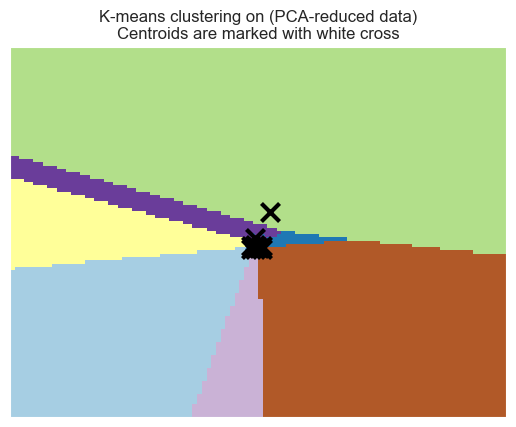

In [30]:
import matplotlib.pyplot as plt

kmeans = KMeans(init="k-means++", n_clusters=11, random_state=42)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], ".", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="k",
    zorder=10,
)
plt.title(
    "K-means clustering on (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

The PCA-reduced K-Means clustering visualization shows well how there are a lot of overlaying categories. The silhouette score was always near 0 which indicates overlapping clusters.

# GMM

In [31]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=11, random_state=42)
y_pred = gm.fit_predict(x_vec_train)

gm_red = GaussianMixture(n_components=11, random_state=42)
y_pred_red = gm_red.fit_predict(reduced_data)

In [32]:
print("Original Dataset")
performance(None, 'GMM', 5000, 11, y_pred)
print()
print("PCA reduced")
performance(None, 'GMM_PCA2', 5000, 11, y_pred_red, train_set=reduced_data)

Original Dataset
Homogeneity: 	0.0777389385
Completeness: 	0.4396156962
V-measure: 	0.1321154012

PCA reduced
Homogeneity: 	0.2903537671
Completeness: 	0.3146513383
V-measure: 	0.3020146461


# Hierarchical Clustering

In [33]:
from sklearn.cluster import AgglomerativeClustering
clustering  = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
y_pred = clustering.fit_predict(x_vec_train)

clustering_red = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
y_pred_red = clustering_red.fit_predict(reduced_data)

In [34]:
print("Original Dataset")
performance(None, 'Hierarchical', 5000, None, y_pred)
print()
print("PCA reduced")
performance(None, 'Hierarchical_PCA2', 5000, None, y_pred_red, train_set=reduced_data)
print()

Original Dataset
Homogeneity: 	1.0000000000
Completeness: 	0.3382464187
V-measure: 	0.5055069291

PCA reduced
Homogeneity: 	1.0000000000
Completeness: 	0.3382464187
V-measure: 	0.5055069291



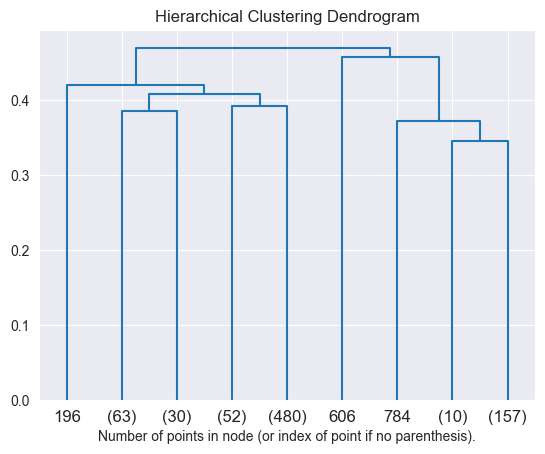

In [35]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

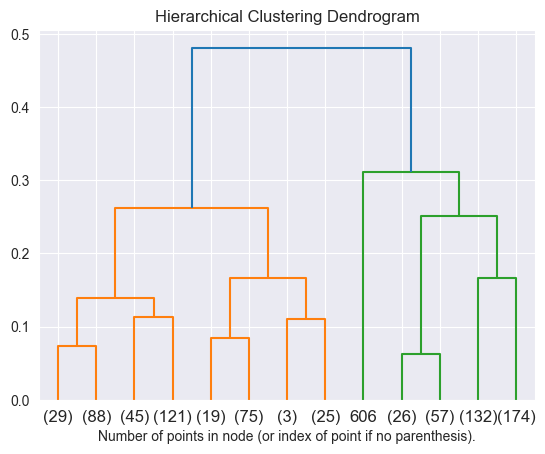

In [36]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering_red, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [37]:
# fig2 = plt.figure()
# ax2 = fig2.add_subplot(121, projection="3d", elev=7, azim=0.45)
# ax2.set_position([0, 0, 0.95, 1])
# for l in np.unique(clustering.labels_):
#     ax2.scatter(
#         x_vec_train[clustering.labels_ == l, 0],
#         x_vec_train[clustering.labels_ == l, 1],
#         x_vec_train[clustering.labels_ == l, 2],
#         color=plt.cm.jet(float(l) / np.max(clustering_red.labels_ + 1)),
#         s=20,
#         edgecolor="k",
#     )
#
# plt.show()

# Conclusion:

In [38]:
df_scores = pd.DataFrame(saved_scores)

In [44]:
df_scores.sort_values(by='Silhouette Score', ascending=True).head(30)

,Type,Dimension,k,Homogeneity,Completeness,V-measure,Silhouette Score
1132,K-Ms×PCA,600,17.0,0.273392,0.377497,0.317119,-0.116679
1006,K-Ms×PCA,530,17.0,0.271588,0.354972,0.307732,-0.090650
1163,K-Ms×PCA,620,12.0,0.185174,0.377004,0.248360,-0.089245
988,K-Ms×PCA,520,17.0,0.271312,0.350302,0.305788,-0.089138
36,K-Ms×PCA,2,19.0,0.342668,0.289552,0.313879,-0.085407
536,K-Ms×PCA,270,15.0,0.407391,0.463345,0.433570,-0.083437
935,K-Ms×PCA,490,18.0,0.300139,0.389514,0.339035,-0.083280
1325,K-Ms×PCA,710,12.0,0.272312,0.359230,0.309790,-0.083173
716,K-Ms×PCA,370,15.0,0.300792,0.401998,0.344108,-0.082638
1384,K-Ms×PCA,740,17.0,0.310643,0.391322,0.346347,-0.082467


The classifications didn't turn out that greate as I expected. Reducing the dimensions helped a lot with categorization. The Bayesian methods from Lab5 performed better than these classifications.
The best outcomes were:
1) k = 13, dim = 80  --> v-measure: 0.479, Silhouette: -0.0414
2) k = 13, dim = 30  --> v-measure: 0.477, Silhouette: -0.031
3) k = 17, dim = 600 --> v-measure: 0.477, Silhouette: -0.116679

The majority of top 30 results (both for Silhouette and v-measure) are k > 11, which implies that it be a good idea to increase the category numbers for our class, to add new categories. This data set has 11 categories for different wikipedia articles as (People, Science, Arts etc.).

Majority of Silhoutte score was near 0 which indicates overlapping clusters. Increasing the category numbers might solve this.

I still don't know why but the accuracy measures for Hierarchical Clustering and GMM are the same.